## No Dropout CNN for CIFAR

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1250/1250 [==============================] - 64s 50ms/step - loss: 1.5873 - accuracy: 0.4207 - val_loss: 1.3016 - val_accuracy: 0.5351
Epoch 2/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.2302 - accuracy: 0.5628 - val_loss: 1.1393 - val_accuracy: 0.6029
Epoch 3/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0781 - accuracy: 0.6212 - val_loss: 1.1324 - val_accuracy: 0.6009
Epoch 4/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9666 - accuracy: 0.6612 - val_loss: 1.0011 - val_accuracy: 0.6511
Epoch 5/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.8895 - accuracy: 0.6906 - val_loss: 0.9298 - val_accuracy: 0.6762
Epoch 6/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.8241 - accuracy: 0.7130 - val_loss: 0.9459 - val_accuracy: 0.6769
Epoch 7/10
1250/1250 [==============================] - 6

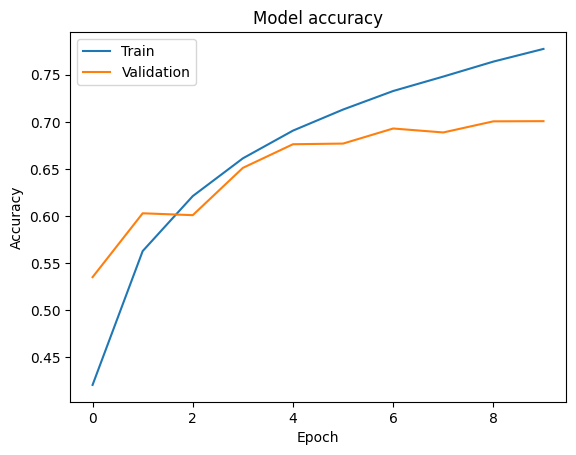

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# With Dropouts

Epoch 1/15
1250/1250 [==============================] - 69s 54ms/step - loss: 1.8048 - accuracy: 0.3297 - val_loss: 1.4219 - val_accuracy: 0.4868
Epoch 2/15
1250/1250 [==============================] - 66s 53ms/step - loss: 1.4734 - accuracy: 0.4647 - val_loss: 1.2445 - val_accuracy: 0.5617
Epoch 3/15
1250/1250 [==============================] - 66s 52ms/step - loss: 1.3517 - accuracy: 0.5149 - val_loss: 1.2833 - val_accuracy: 0.5665
Epoch 4/15
1250/1250 [==============================] - 67s 54ms/step - loss: 1.2771 - accuracy: 0.5472 - val_loss: 1.0849 - val_accuracy: 0.6186
Epoch 5/15
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2180 - accuracy: 0.5708 - val_loss: 1.0952 - val_accuracy: 0.6062
Epoch 6/15
1250/1250 [==============================] - 64s 51ms/step - loss: 1.1762 - accuracy: 0.5875 - val_loss: 1.0001 - val_accuracy: 0.6465
Epoch 7/15
1250/1250 [==============================] - 66s 53ms/step - loss: 1.1491 - accuracy: 0.5988 - val_loss: 0.9736 -

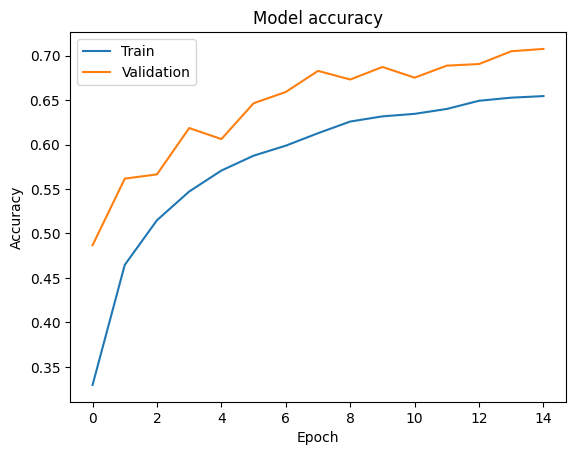

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),


    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/5
1250/1250 [==============================] - 65s 51ms/step - loss: 1.6952 - accuracy: 0.3724 - val_loss: 1.4187 - val_accuracy: 0.4954
Epoch 2/5
1250/1250 [==============================] - 62s 50ms/step - loss: 1.3617 - accuracy: 0.5076 - val_loss: 1.2117 - val_accuracy: 0.5739
Epoch 3/5
1250/1250 [==============================] - 62s 50ms/step - loss: 1.2382 - accuracy: 0.5548 - val_loss: 1.1282 - val_accuracy: 0.6041
Epoch 4/5
1250/1250 [==============================] - 61s 49ms/step - loss: 1.1613 - accuracy: 0.5859 - val_loss: 1.0258 - val_accuracy: 0.6402
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.9826 - accuracy: 0.6564
Test accuracy: 0.6564000248908997
Error percentage: 34.359997510910034


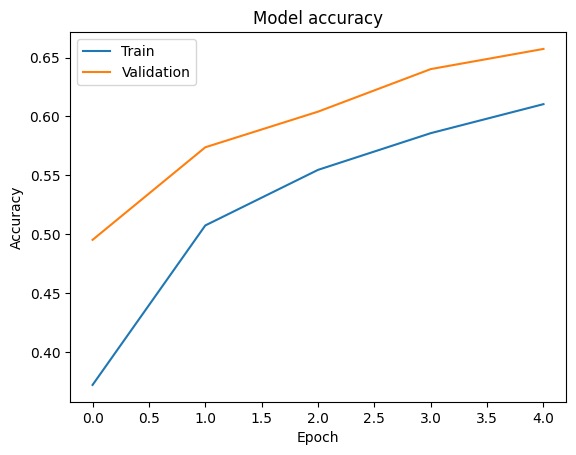

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),


    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),


    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/5
1250/1250 [==============================] - 62s 48ms/step - loss: 1.6989 - accuracy: 0.3737 - val_loss: 1.3853 - val_accuracy: 0.5023
Epoch 2/5
1250/1250 [==============================] - 57s 46ms/step - loss: 1.3574 - accuracy: 0.5095 - val_loss: 1.2066 - val_accuracy: 0.5650
Epoch 3/5
1250/1250 [==============================] - 58s 46ms/step - loss: 1.2229 - accuracy: 0.5673 - val_loss: 1.0735 - val_accuracy: 0.6145
Epoch 4/5
1250/1250 [==============================] - 57s 46ms/step - loss: 1.1325 - accuracy: 0.6024 - val_loss: 1.0622 - val_accuracy: 0.6223
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.9995 - accuracy: 0.6450
Test accuracy: 0.6449999809265137
Error percentage: 35.50000190734863


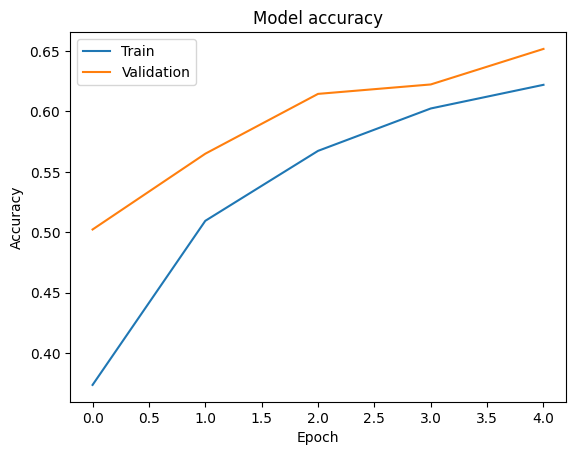

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),


    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),


    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/5
1250/1250 [==============================] - 60s 47ms/step - loss: 1.8278 - accuracy: 0.3192 - val_loss: 1.5059 - val_accuracy: 0.4535
Epoch 2/5
1250/1250 [==============================] - 57s 45ms/step - loss: 1.5020 - accuracy: 0.4599 - val_loss: 1.3044 - val_accuracy: 0.5332
Epoch 3/5
1250/1250 [==============================] - 57s 45ms/step - loss: 1.3878 - accuracy: 0.5059 - val_loss: 1.2293 - val_accuracy: 0.5548
Epoch 4/5
1250/1250 [==============================] - 59s 47ms/step - loss: 1.3020 - accuracy: 0.5366 - val_loss: 1.1666 - val_accuracy: 0.5824
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 1.1169 - accuracy: 0.6086
Test accuracy: 0.6086000204086304
Error percentage: 39.13999795913696


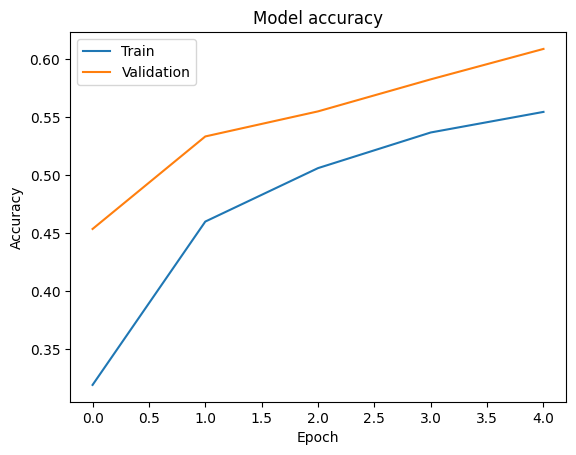

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),


    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Without dropout layer

Epoch 1/5
1250/1250 [==============================] - 57s 45ms/step - loss: 1.5476 - accuracy: 0.4358 - val_loss: 1.2837 - val_accuracy: 0.5454
Epoch 2/5
1250/1250 [==============================] - 54s 43ms/step - loss: 1.1957 - accuracy: 0.5739 - val_loss: 1.1363 - val_accuracy: 0.5937
Epoch 3/5
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0481 - accuracy: 0.6325 - val_loss: 1.0073 - val_accuracy: 0.6458
Epoch 4/5
1250/1250 [==============================] - 53s 43ms/step - loss: 0.9444 - accuracy: 0.6690 - val_loss: 1.0474 - val_accuracy: 0.6306
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.9605 - accuracy: 0.6675
Test accuracy: 0.6675000190734863
Error percentage: 33.24999809265137


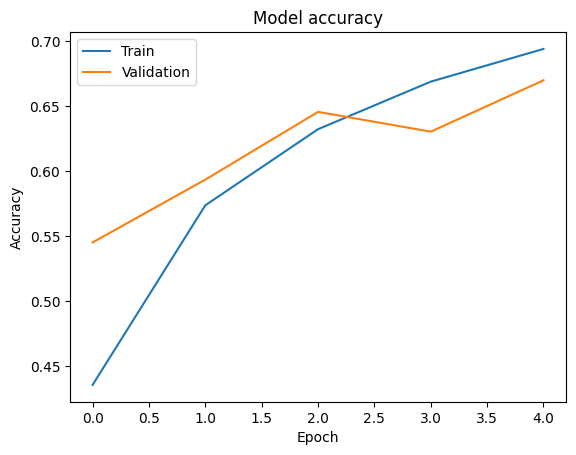

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/20
1250/1250 [==============================] - 57s 44ms/step - loss: 1.5831 - accuracy: 0.4205 - val_loss: 1.3223 - val_accuracy: 0.5254
Epoch 2/20
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2025 - accuracy: 0.5704 - val_loss: 1.1646 - val_accuracy: 0.5830
Epoch 3/20
1250/1250 [==============================] - 52s 42ms/step - loss: 1.0499 - accuracy: 0.6291 - val_loss: 1.0606 - val_accuracy: 0.6315
Epoch 4/20
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9553 - accuracy: 0.6652 - val_loss: 1.0347 - val_accuracy: 0.6323
Epoch 5/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.8880 - accuracy: 0.6876 - val_loss: 0.9676 - val_accuracy: 0.6617
Epoch 6/20
1250/1250 [==============================] - 53s 43ms/step - loss: 0.8255 - accuracy: 0.7096 - val_loss: 0.9579 - val_accuracy: 0.6692
Epoch 7/20
1250/1250 [==============================] - 53s 43ms/step - loss: 0.7800 - accuracy: 0.7268 - val_loss: 0.9292 -

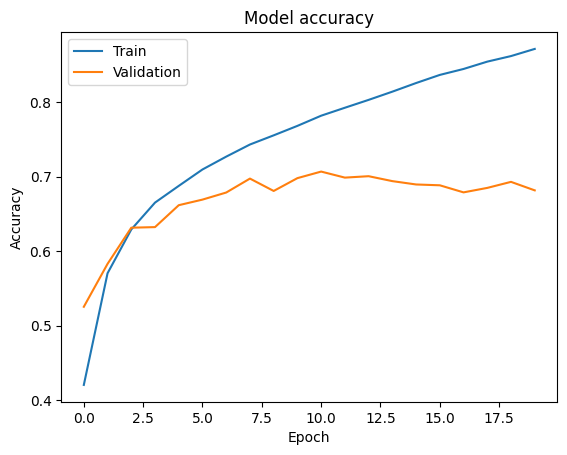

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100



print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


170498071/170498071 [==============================] - 10s 0us/step
Epoch 1/20
1250/1250 [==============================] - 63s 49ms/step - loss: 1.5589 - accuracy: 0.4318 - val_loss: 1.2790 - val_accuracy: 0.5439
Epoch 2/20
1250/1250 [==============================] - 61s 49ms/step - loss: 1.1829 - accuracy: 0.5773 - val_loss: 1.0983 - val_accuracy: 0.6107
Epoch 3/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.0371 - accuracy: 0.6338 - val_loss: 1.0283 - val_accuracy: 0.6386
Epoch 4/20
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9341 - accuracy: 0.6711 - val_loss: 0.9656 - val_accuracy: 0.6640
Epoch 5/20
1250/1250 [==============================] - 59s 47ms/step - loss: 0.8517 - accuracy: 0.6993 - val_loss: 0.9166 - val_accuracy: 0.6809
Epoch 6/20
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7890 - accuracy: 0.7211 - val_loss: 0.9157 - val_accuracy: 0.6856
Epoch 7/20
1250/1250 [==============================] - 

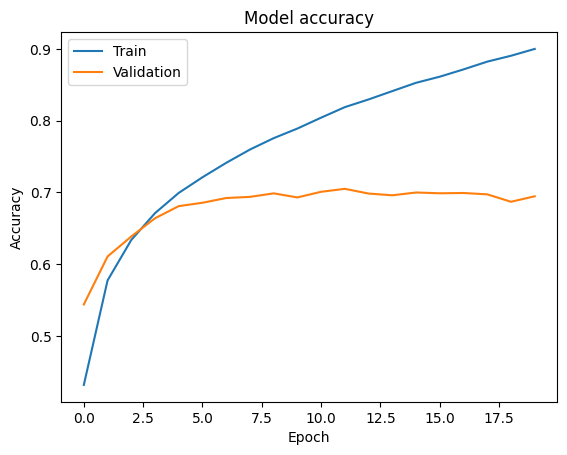

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)


error_percentage = (1 - test_acc) * 100



print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
